In [1]:
import requests
import pandas as pd
my_key_variable = '290c4b1c7112bc7ca01c93d1f5b93fe905d2bfe0'
 
url = 'https://api.census.gov/data/2017/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=state:*&key={}'.format(my_key_variable)
 
response = requests.get(url)

df = pd.DataFrame(response.json())

new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

This is a temporary code block, I made it so I wouldn't have to keep rerunning the API request to refresh my data every time I f*** up the data frame. Then I checked to see what the original shape looked like.

In [14]:
Data = df
Data.shape

(929468, 32)

This block is for pulling only the columns I wanted.

In [15]:
# 'GEO_ID', 'NAME', 'NAICS2017', 'NAICS2017_LABEL', 'SEX', 'SEX_LABEL',
# 'ETH_GROUP', 'ETH_GROUP_LABEL', 'RACE_GROUP', 'RACE_GROUP_LABEL',
# 'VET_GROUP', 'VET_GROUP_LABEL', 'EMPSZFI', 'EMPSZFI_LABEL', 'YEAR',
# 'FIRMPDEMP', 'FIRMPDEMP_F', 'RCPPDEMP', 'RCPPDEMP_F', 'EMP', 'EMP_F',
# 'PAYANN', 'PAYANN_F', 'FIRMPDEMP_S', 'FIRMPDEMP_S_F', 'RCPPDEMP_S',
# 'RCPPDEMP_S_F', 'EMP_S', 'EMP_S_F', 'PAYANN_S', 'PAYANN_S_F', 'state'

table = Data[['NAME','NAICS2017_LABEL','SEX_LABEL','ETH_GROUP_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL','EMPSZFI_LABEL','FIRMPDEMP','RCPPDEMP','EMP','PAYANN']]

Filtered the dataframe to only look at the total data for each Firm Size. You can see the rows dropped to only have one entry for each of the 10 firm sizes.

In [16]:
table = table[table['NAICS2017_LABEL'] == 'Total for all sectors']
table = table[table['SEX_LABEL'] == 'Total']
table = table[table['ETH_GROUP_LABEL'] == 'Total']
table = table[table['RACE_GROUP_LABEL'] == 'Total']
table = table[table['VET_GROUP_LABEL'] == 'Total']
table.shape

(510, 11)

1. Put necessary "string" columns in one data frame, and changed necessary "number" columns datatypes to float, then put them into a second data frame.

2. Added the "string" columns into the "number" columns' data frame.

3. Filtered out all rows, except for the "All firms" rows. Then I created the "Average_Revenue" column and sorted the rows based on that column thinking it would make the chart look smooth, but I don't think it turned out how I expected.

In [24]:
# 1
businessSize = table[['NAME','EMPSZFI_LABEL']]
businessNums = table[['FIRMPDEMP','RCPPDEMP','EMP','PAYANN']].astype('float')

# 2
businessNums['EMPSZFI_LABEL'] = businessSize['EMPSZFI_LABEL']
businessNums['NAME'] = businessSize['NAME']

# 3
business = businessNums[businessNums['EMPSZFI_LABEL'] == 'All firms']
business['Average_Revenue'] = business['RCPPDEMP']/business['FIRMPDEMP']
business.sort_values('Average_Revenue', ascending=False)


C:\Users\temes\AppData\Local\Temp\ipykernel_14004\899890451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business['Average_Revenue'] = business['RCPPDEMP']/business['FIRMPDEMP']


,FIRMPDEMP,RCPPDEMP,EMP,PAYANN,EMPSZFI_LABEL,NAME,Average_Revenue
535713,14977.0,2.012729e+08,475719.0,35446392.0,All firms,District of Columbia,13438.797623
394942,423488.0,3.760759e+09,10783075.0,554860958.0,All firms,Texas,8880.438948
817624,63839.0,5.142087e+08,1575730.0,66325815.0,All firms,Kentucky,8054.773289
677342,68248.0,5.196742e+08,1536063.0,93683493.0,All firms,Connecticut,7614.496645
292223,91932.0,6.952986e+08,2577217.0,115502953.0,All firms,Tennessee,7563.183766
641326,19704.0,1.480523e+08,395656.0,21878259.0,All firms,Delaware,7513.817651
752361,102435.0,7.587171e+08,2674980.0,118249991.0,All firms,Indiana,7406.815083
212567,173255.0,1.281479e+09,4749620.0,218098393.0,All firms,Ohio,7396.491155
902992,115144.0,8.065939e+08,2673078.0,140826766.0,All firms,Minnesota,7005.088124
637260,247995.0,1.730040e+09,5499081.0,295281702.0,All firms,Illinois,6976.107422


Create Chart3

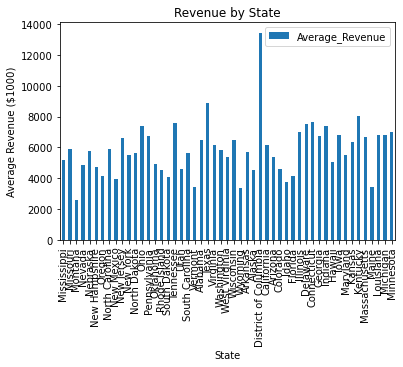

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = business.plot(title = 'Revenue by State',kind='bar',x='NAME',y='Average_Revenue')
ax.set_xlabel('State')
ax.set_ylabel('Average Revenue ($1000)')
plt.show()

Took the "Firms with no employees" rows, and created the "Average_Payroll" column.

In [29]:
business2 = business[business['EMPSZFI_LABEL'] != 'Firms with no employees']

business2['Average_Payroll'] = business2['PAYANN']/business['EMP']
business2.head(51)

,FIRMPDEMP,RCPPDEMP,EMP,PAYANN,EMPSZFI_LABEL,NAME,Average_Revenue,Average_Payroll
393,41265.0,2.143058e+08,894056.0,32717028.0,All firms,Mississippi,5193.402908,36.593936
18092,116156.0,6.815255e+08,2472316.0,113546455.0,All firms,Missouri,5867.329212,45.927161
35942,31811.0,8.316378e+07,366851.0,13919489.0,All firms,Montana,2614.308824,37.943168
37161,51408.0,2.496420e+08,1170673.0,50145977.0,All firms,Nevada,4856.093235,42.835170
68228,43344.0,2.510193e+08,875463.0,37698950.0,All firms,Nebraska,5791.327058,43.061728
102013,29502.0,1.401018e+08,593505.0,29397236.0,All firms,New Hampshire,4748.893194,49.531573
104383,90979.0,3.747105e+08,1570382.0,75136442.0,All firms,Oregon,4118.647996,47.845965
110869,166609.0,9.802872e+08,3647126.0,168144709.0,All firms,North Carolina,5883.759281,46.103345
144504,32562.0,1.277353e+08,608377.0,24377969.0,All firms,New Mexico,3922.833948,40.070497
144763,188322.0,1.246022e+09,3750566.0,222190319.0,All firms,New Jersey,6616.443320,59.241810


Created Chart4

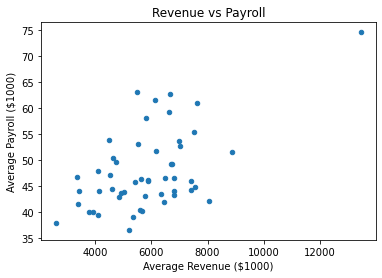

In [30]:
ax = business2.plot(title = 'Revenue vs Payroll', kind='scatter', x='Average_Revenue', y='Average_Payroll')
ax.set_xlabel('Average Revenue ($1000)')
ax.set_ylabel('Average Payroll ($1000)')
plt.show()